In [11]:
import time

import umap
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE  

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from autoencoders import VanillaAutoencoder, VariationalAutoencoder, vae_loss_function

sns.set_style("whitegrid")

In [4]:
def plot_dim_reduction(data, colors, reducer, ax, title=None):
    """
    Plot 2D projection of data using a dimensionality reduction method.
    
    Parameters:
    -----------
    data : array-like
        The input data to reduce and plot.
    colors : array-like
        Colors for each data point.
    reducer : object
        A scikit-learn compatible dimensionality reduction object 
        (e.g., PCA(), TSNE(), UMAP()).
    ax : matplotlib.axes.Axes
        The axis object to plot on.
    title : str, optional
        Title for the plot. If None, uses the reducer's class name.
    """
    X_reduced = reducer.fit_transform(data).T
    
    ax.scatter(X_reduced[0], X_reduced[1], c=colors, cmap=plt.cm.jet)
    ax.set_title(title if title else type(reducer).__name__)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    ax.set_ylabel('Y coordinate')
    ax.set_xlabel('X coordinate')

# 1. Dimensionality Reduction on Digits Dataset

PCA done in 0.00 seconds.
MDS done in 38.07 seconds.
Isomap done in 0.45 seconds.
LLE done in 0.15 seconds.
t-SNE done in 1.60 seconds.
UMAP done in 1.59 seconds.


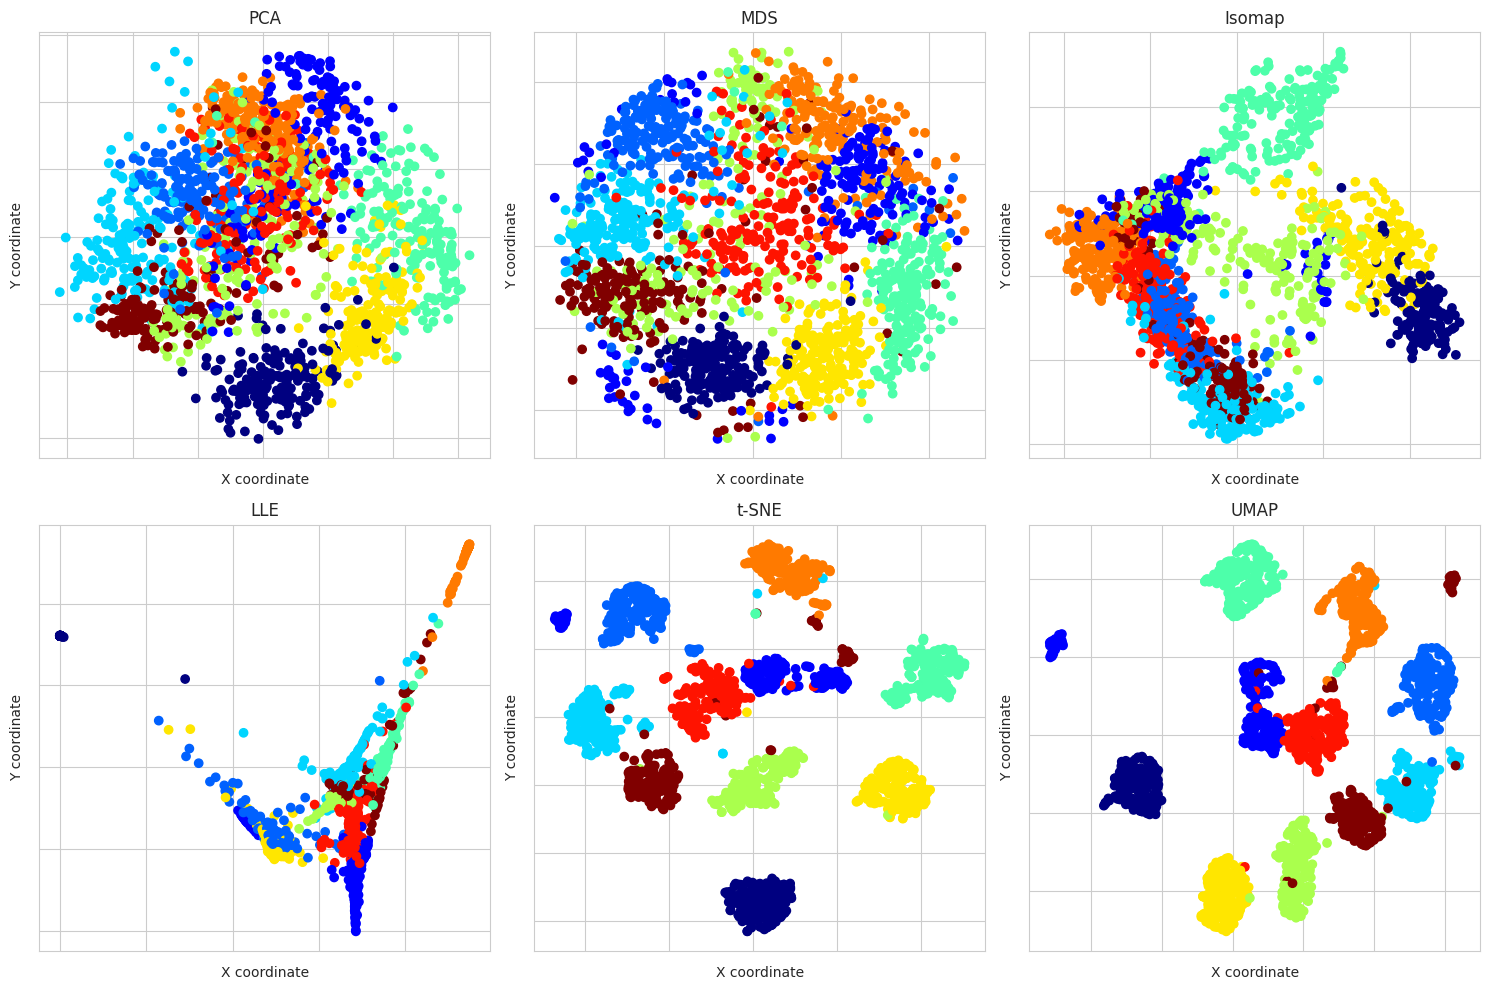

In [28]:
# Load dataset (digits)
digits = datasets.load_digits()
data = digits.data
colors = digits.target

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

times = []
reducers = {
    "PCA": PCA(n_components=2),
    "MDS": MDS(n_components=2, n_init=4, random_state=42),
    "Isomap": Isomap(n_neighbors=10, n_components=2),
    "LLE": LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', random_state=42),
    "t-SNE": TSNE(n_components=2, init='pca', random_state=42),
    "UMAP": umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.5),
}

for i, (name, reducer) in enumerate(reducers.items()):
    row, col = divmod(i, 3)
    start = time.time()
    plot_dim_reduction(data, colors, reducer, axes[row, col], name)
    elapsed = time.time() - start
    times.append((name, elapsed))
    print(f"{name} done in {elapsed:.2f} seconds.")

plt.tight_layout()
plt.show()

# 2. Dimensionality Reduction on Swiss Roll Dataset

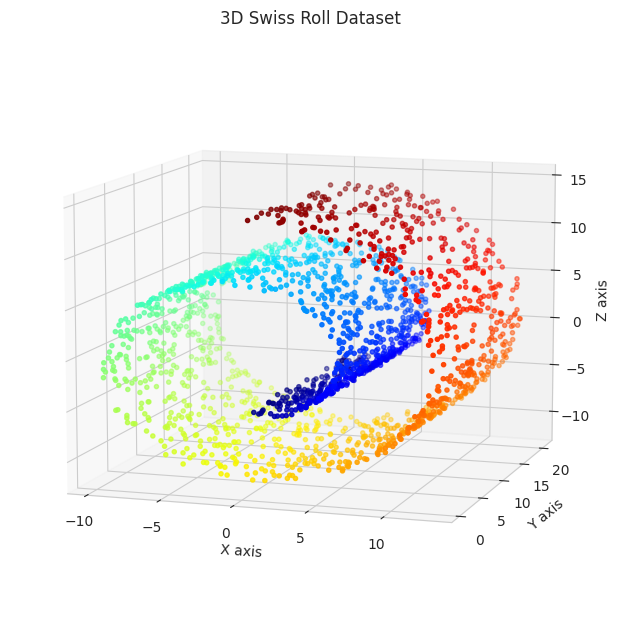

In [29]:
# Load dataset (swiss-roll)
data, colors = datasets.make_swiss_roll(n_samples=2000, noise=0.1, random_state=42)

# Plot 3D swiss-roll
fig = plt.figure(figsize=(45, 25))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap=plt.cm.jet, s=9, lw=1)
ax.view_init(10, -72)
ax.set_title('3D Swiss Roll Dataset')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


PCA done in 0.00 seconds.
MDS done in 25.45 seconds.
Isomap done in 0.57 seconds.
LLE done in 0.12 seconds.
t-SNE done in 1.68 seconds.
UMAP done in 1.99 seconds.


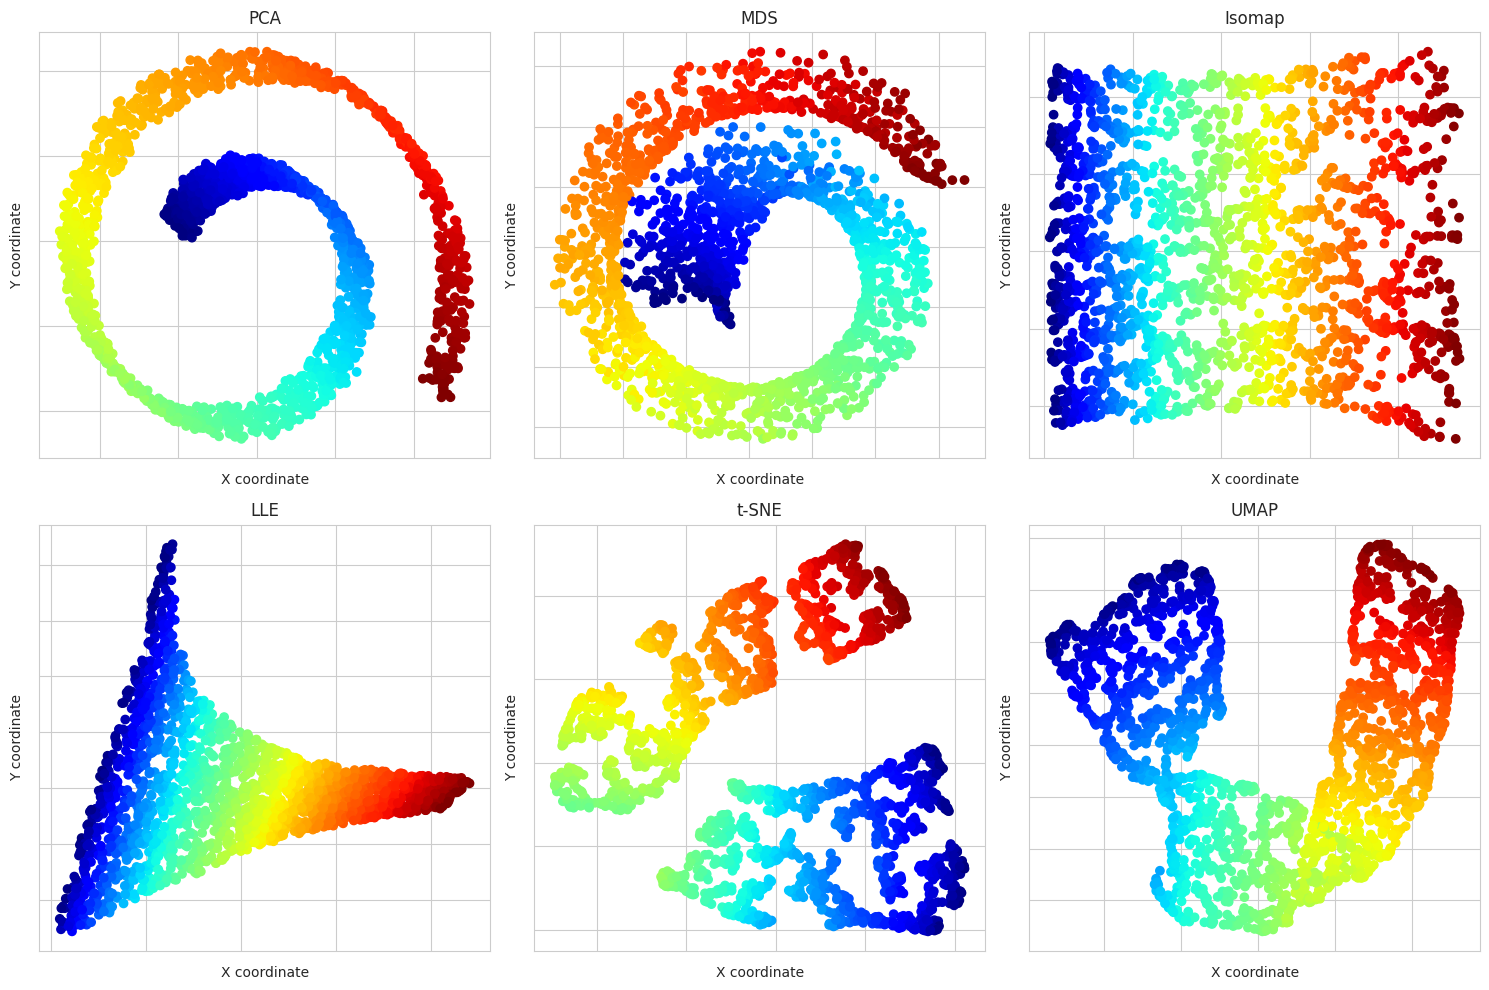

In [30]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

times = []
reducers = {   
    "PCA": PCA(n_components=2),
    "MDS": MDS(n_components=2, n_init=4, random_state=42),
    "Isomap": Isomap(n_neighbors=10, n_components=2),
    "LLE": LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', random_state=42),
    "t-SNE": TSNE(n_components=2, init='pca', random_state=42),
    "UMAP": umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.5),
}

for i, (name, reducer) in enumerate(reducers.items()):
    row, col = divmod(i, 3)
    start = time.time()
    plot_dim_reduction(data, colors, reducer, axes[row, col], name)
    elapsed = time.time() - start
    times.append((name, elapsed))
    print(f"{name} done in {elapsed:.2f} seconds.")

plt.tight_layout()
plt.show()

# 3. UMAP Parameters

**Parameters**
- n_neighbors
- min_dist

## 3.1. Digits Dataset

UMAP (n_neighbors=5, min_dist=0.1) done in 1.64 seconds.
UMAP (n_neighbors=15, min_dist=0.1) done in 2.03 seconds.
UMAP (n_neighbors=50, min_dist=0.1) done in 2.94 seconds.
UMAP (n_neighbors=5, min_dist=0.5) done in 1.59 seconds.
UMAP (n_neighbors=15, min_dist=0.5) done in 1.94 seconds.
UMAP (n_neighbors=50, min_dist=0.5) done in 3.10 seconds.


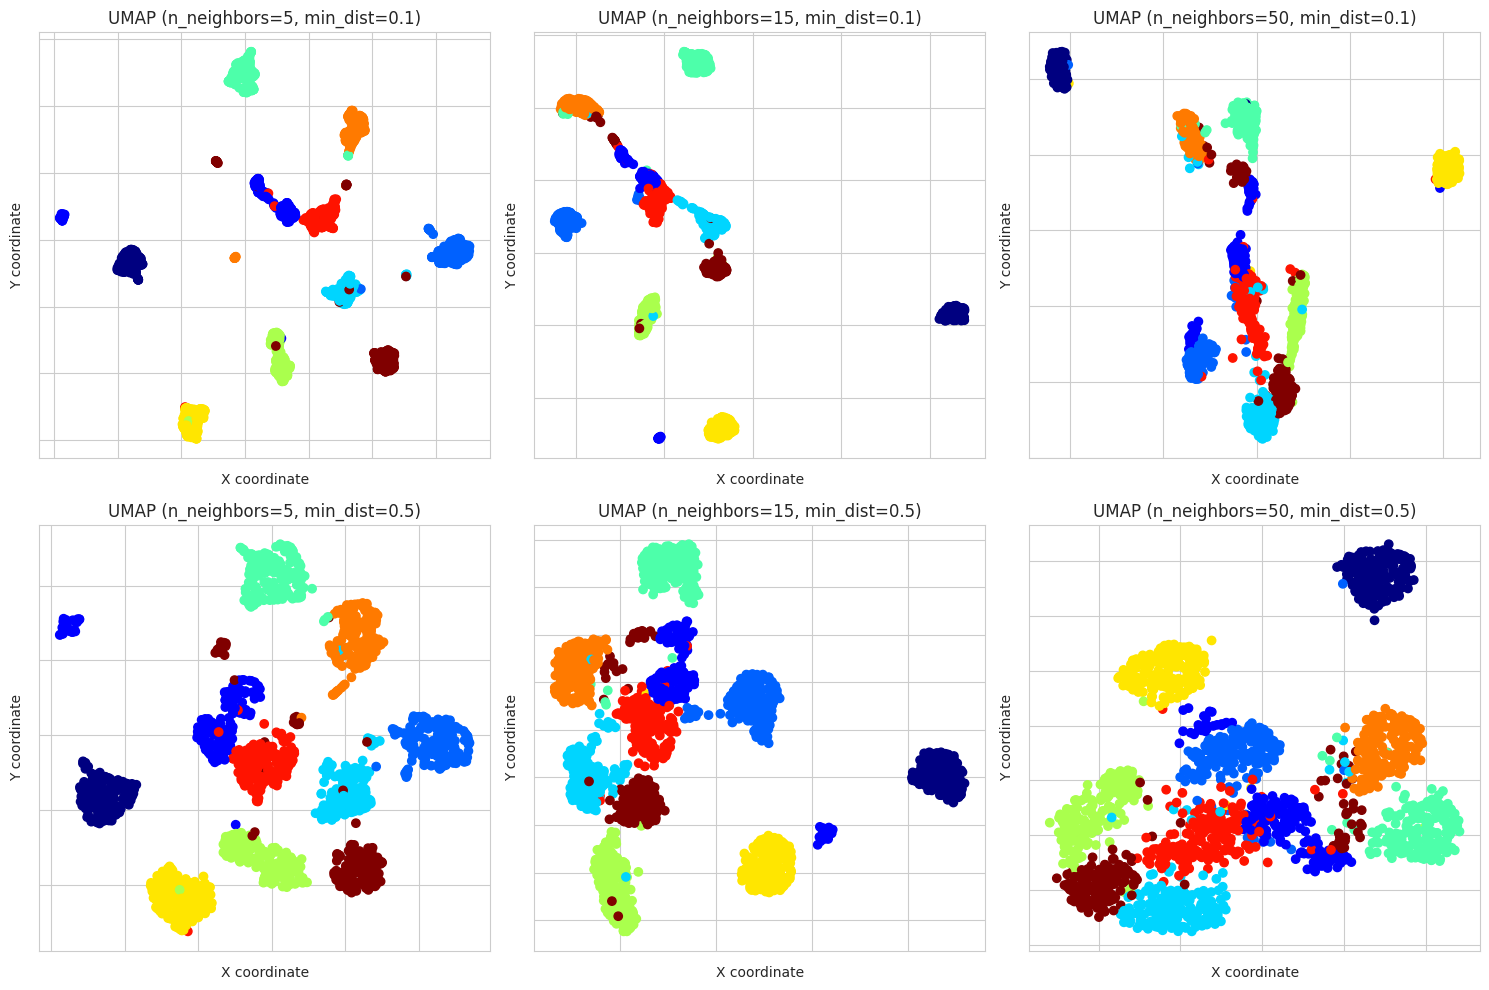

In [23]:
# Load dataset (digits)
digits = datasets.load_digits()
data = digits.data
colors = digits.target

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

times = []
reducers = {
    "UMAP (n_neighbors=5, min_dist=0.1)": umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.1),
    "UMAP (n_neighbors=15, min_dist=0.1)": umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1),
    "UMAP (n_neighbors=50, min_dist=0.1)": umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.1),
    "UMAP (n_neighbors=5, min_dist=0.5)": umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.5),
    "UMAP (n_neighbors=15, min_dist=0.5)": umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.5),
    "UMAP (n_neighbors=50, min_dist=0.5)": umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.5),
}

for i, (name, reducer) in enumerate(reducers.items()):
    row, col = divmod(i, 3)
    start = time.time()
    plot_dim_reduction(data, colors, reducer, axes[row, col], name)
    elapsed = time.time() - start
    times.append((name, elapsed))
    print(f"{name} done in {elapsed:.2f} seconds.")

plt.tight_layout()
plt.show()

## 3.2. Swiss Roll Dataset

UMAP (n_neighbors=5, min_dist=0.1) done in 1.93 seconds.
UMAP (n_neighbors=15, min_dist=0.1) done in 1.93 seconds.
UMAP (n_neighbors=50, min_dist=0.1) done in 2.13 seconds.
UMAP (n_neighbors=5, min_dist=0.5) done in 1.91 seconds.
UMAP (n_neighbors=15, min_dist=0.5) done in 1.94 seconds.
UMAP (n_neighbors=50, min_dist=0.5) done in 2.13 seconds.


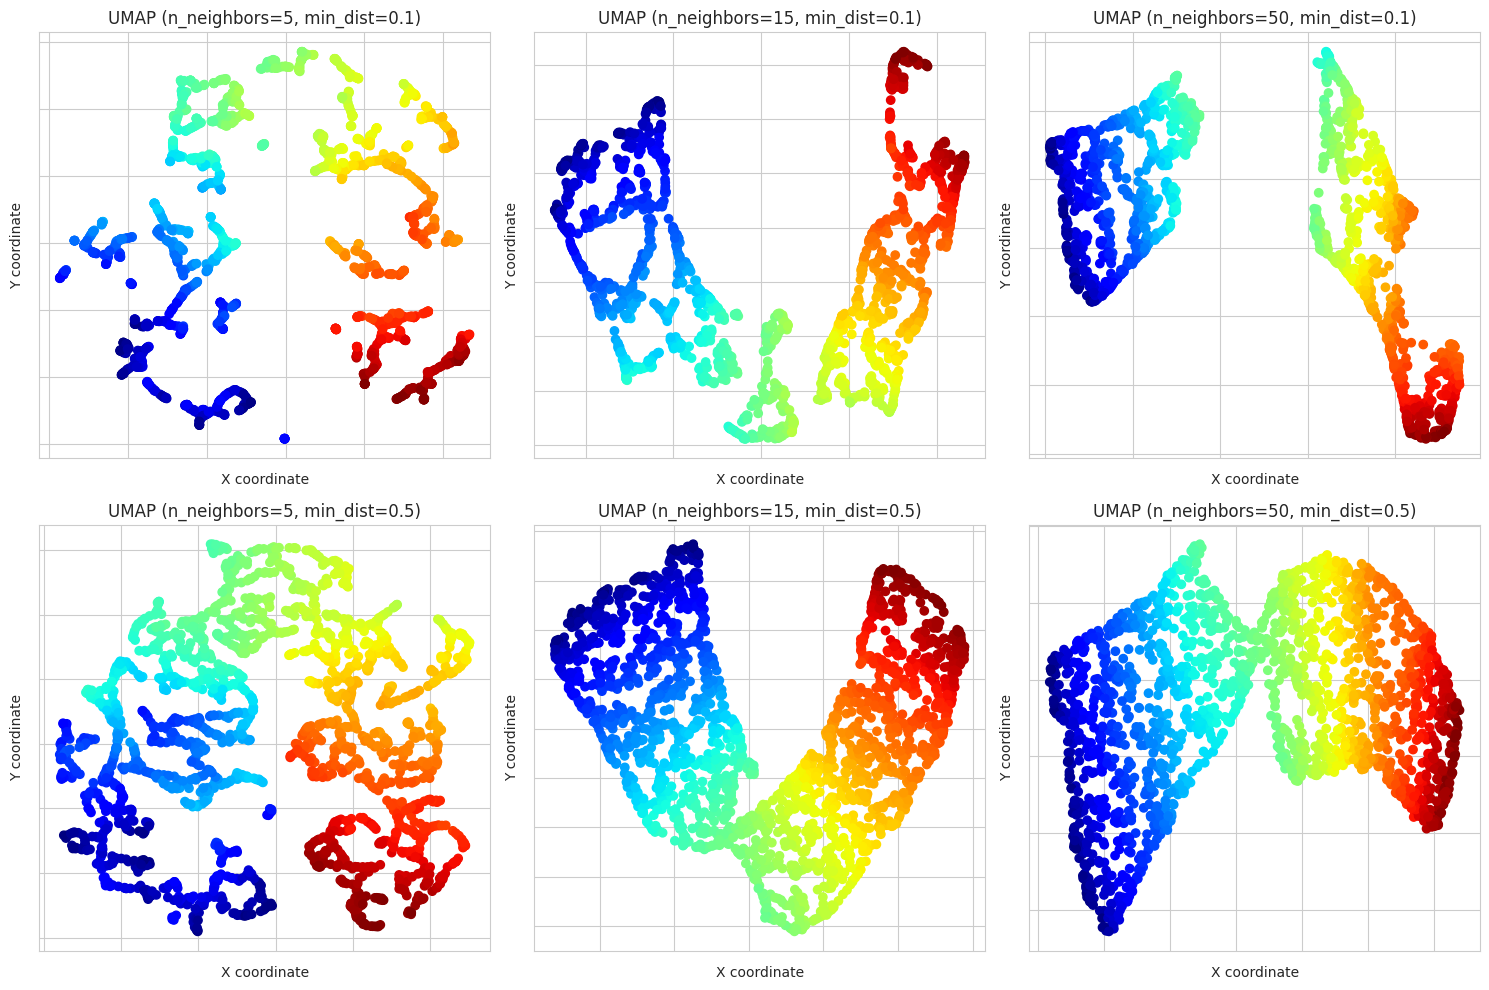

In [24]:
# Load dataset (digits)
data, colors = datasets.make_swiss_roll(n_samples=2000, noise=0.1, random_state=42)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

times = []
reducers = {
    "UMAP (n_neighbors=5, min_dist=0.1)": umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.1),
    "UMAP (n_neighbors=15, min_dist=0.1)": umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1),
    "UMAP (n_neighbors=50, min_dist=0.1)": umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.1),
    "UMAP (n_neighbors=5, min_dist=0.5)": umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.5),
    "UMAP (n_neighbors=15, min_dist=0.5)": umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.5),
    "UMAP (n_neighbors=50, min_dist=0.5)": umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.5),
}

for i, (name, reducer) in enumerate(reducers.items()):
    row, col = divmod(i, 3)
    start = time.time()
    plot_dim_reduction(data, colors, reducer, axes[row, col], name)
    elapsed = time.time() - start
    times.append((name, elapsed))
    print(f"{name} done in {elapsed:.2f} seconds.")

plt.tight_layout()
plt.show()

# 4. Autoencoders

**Parameters**
- latent space size (**2**)
- number of layers and neurons/layer
- loss function
- optimizer (**Adam**)

**Autoencoder Loss (MSE)**

$\displaystyle
\mathcal{L}_{AE} = \mathcal{L}_{Recon} = \frac{1}{N} \sum_{i=1}^{N} || x_i - \hat{x}_i ||^2
$

**Variational Autoencoder Loss**

$\displaystyle
\begin{aligned}
\mathcal{L}_{VAE} &= \mathcal{L}_{Recon} + \mathcal{L}_{KL} \\
&= \underbrace{\frac{1}{N} \sum_{i=1}^{N} || x_i - \hat{x}_i ||^2}_{\text{MSE Reconstruction}} - \underbrace{\frac{1}{2} \sum_{j=1}^{J} \left( 1 + \log(\sigma_j^2) - \mu_j^2 - \sigma_j^2 \right)}_{\text{KL Divergence}}
\end{aligned}
$

In [34]:
def get_dataset(name):
    if name == "digits":
        data, t = datasets.load_digits(return_X_y=True)
    elif name == "swiss_roll":
        data, t = datasets.make_swiss_roll(n_samples=2000, noise=0.05, random_state=42)
    
    # Scale to [0,1] for stability
    data = MinMaxScaler().fit_transform(data)
    
    # Convert to Tensor
    X = torch.FloatTensor(data)
    y = torch.tensor(t) if name == "digits" else torch.tensor(t)
    
    return DataLoader(TensorDataset(X, y), batch_size=64, shuffle=True), X, y

def train(model, dataloader, epochs=150, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    
    is_vae = isinstance(model, VariationalAutoencoder)
    
    for epoch in range(epochs):
        for batch_x, _ in dataloader:
            optimizer.zero_grad()
            
            if is_vae:
                recon, mu, logvar = model(batch_x)
                loss = vae_loss_function(recon, batch_x, mu, logvar)
            else:
                recon = model(batch_x)
                loss = F.mse_loss(recon, batch_x, reduction='sum')
            
            loss.backward()
            optimizer.step()
    return model

In [31]:
models = dict()
models['digits'] = { # Models for digits dataset
    # Variation 1: Shallow (Single Hidden Layer)
    "AE (Shallow)": lambda in_dim: VanillaAutoencoder(in_dim, hidden_dims=[128]),
    "VAE (Shallow)": lambda in_dim: VariationalAutoencoder(in_dim, hidden_dims=[128]),
    # Variation 2: Deep (Multiple Hidden Layers)
    "AE (Deep)": lambda in_dim: VanillaAutoencoder(in_dim, hidden_dims=[512, 256]),
    "VAE (Deep)": lambda in_dim: VariationalAutoencoder(in_dim, hidden_dims=[512, 256]),
}
models['swiss_roll'] = { # Models for swiss-roll dataset
    # Variation 1: Shallow (Single Hidden Layer)
    "AE (Shallow)": lambda in_dim: VanillaAutoencoder(in_dim, hidden_dims=[12, 6]),
    "VAE (Shallow)": lambda in_dim: VariationalAutoencoder(in_dim, hidden_dims=[12, 6]),
    # Variation 2: Deep (Multiple Hidden Layers)
    "AE (Deep)": lambda in_dim: VanillaAutoencoder(in_dim, hidden_dims=[32, 16]),
    "VAE (Deep)": lambda in_dim: VariationalAutoencoder(in_dim, hidden_dims=[32, 16]),
}

## 4.1. Digits Dataset

--- Processing Dataset: digits ---
Training AE (Shallow)...
Training VAE (Shallow)...
Training AE (Deep)...
Training VAE (Deep)...


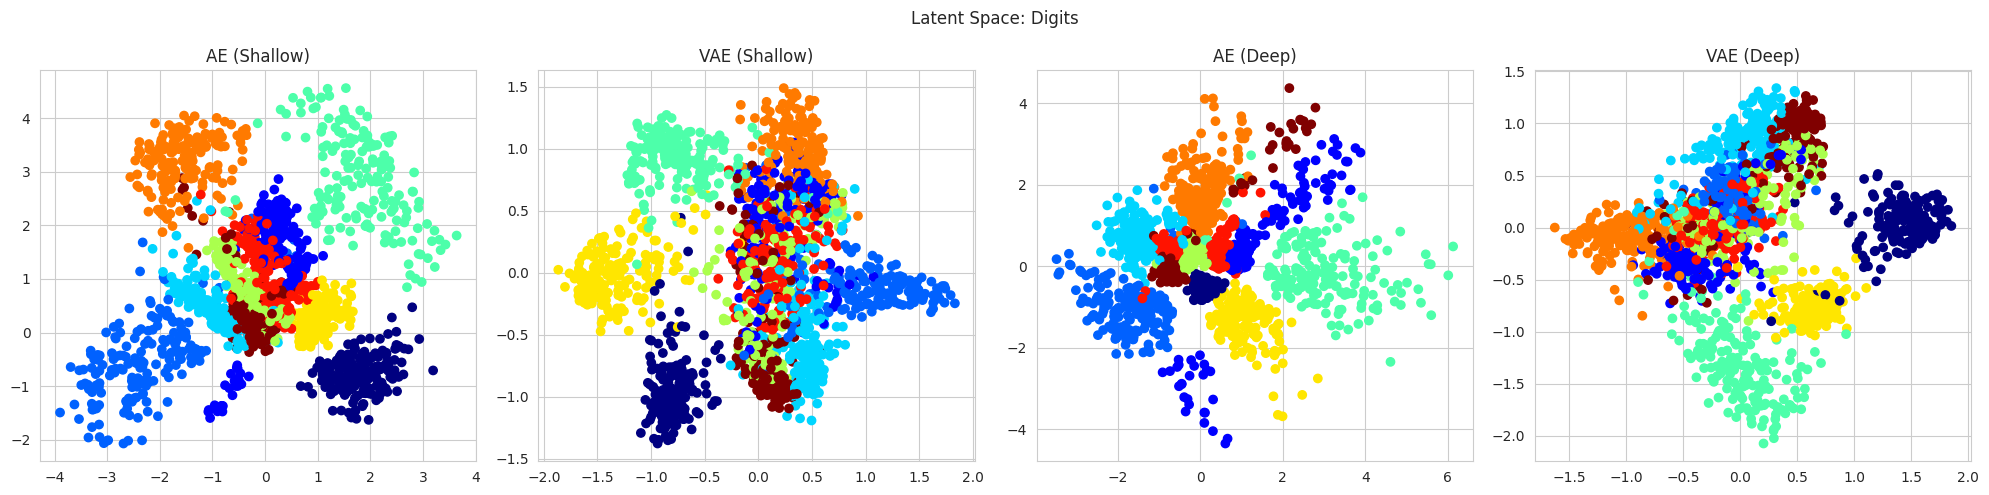

In [32]:
dataset = "digits"

print(f"--- Processing Dataset: {dataset} ---")
results= {}
loader, full_X, full_y = get_dataset(dataset)
input_dim = full_X.shape[1]

# Create plotting figure for this dataset
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle(f"Latent Space: {dataset.replace('_', ' ').title()}")

for i, (model_name, factory_func) in enumerate(models[dataset].items()):
    print(f"Training {model_name}...")
    
    # Instantiate model using the factory and current input_dim
    model = factory_func(input_dim)
    
    # Train
    trained_model = train(model, loader)
    results[model_name] = trained_model
    
    # Visualize
    trained_model.eval()
    with torch.no_grad():
        z = trained_model.get_latent(full_X).numpy()
        
    axes[i].scatter(z[:, 0], z[:, 1], c=full_y, cmap=plt.cm.jet)
    axes[i].set_title(model_name)

plt.tight_layout()
plt.show()

## 4.2 Swiss Roll Dataset

--- Processing Dataset: swiss_roll ---
Training AE (Shallow)...
Training VAE (Shallow)...
Training AE (Deep)...
Training VAE (Deep)...


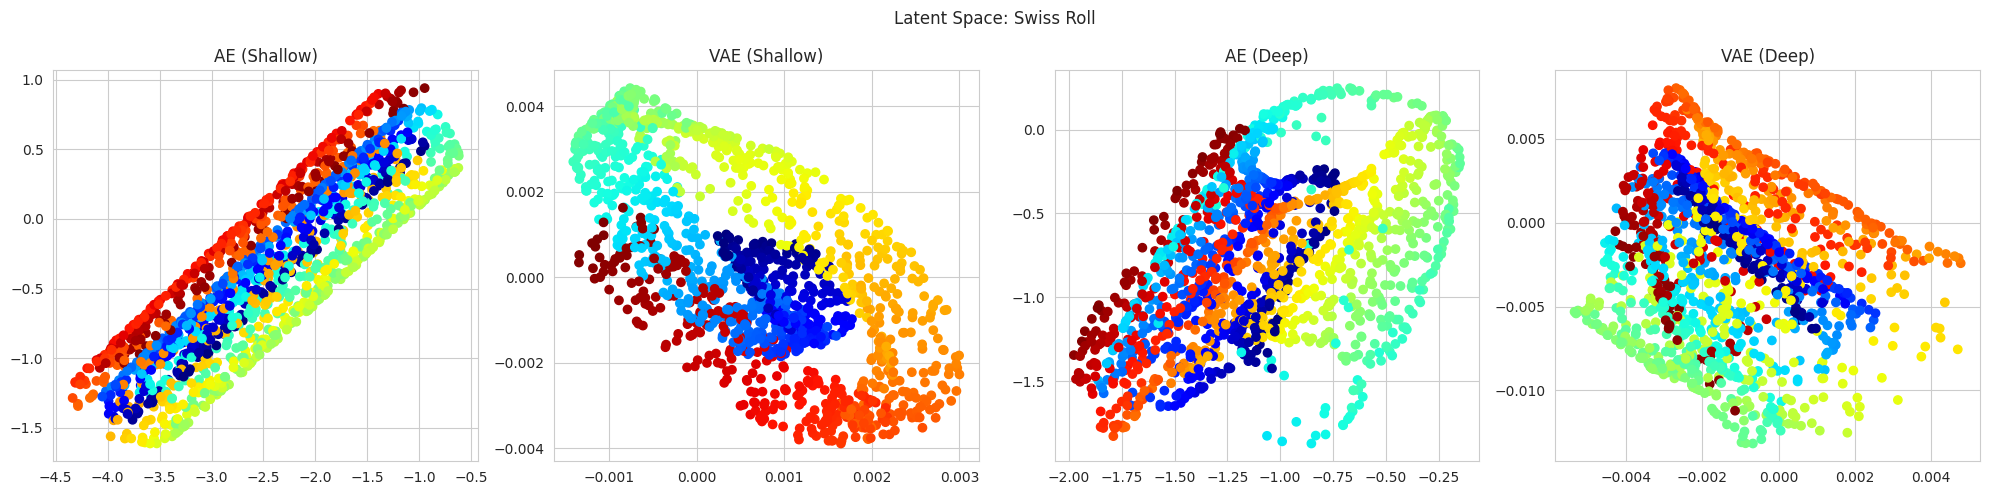

In [33]:
dataset = "swiss_roll"

print(f"--- Processing Dataset: {dataset} ---")
results= {}
loader, full_X, full_y = get_dataset(dataset)
input_dim = full_X.shape[1]

# Create plotting figure for this dataset
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle(f"Latent Space: {dataset.replace('_', ' ').title()}")

for i, (model_name, factory_func) in enumerate(models[dataset].items()):
    print(f"Training {model_name}...")
    
    # Instantiate model using the factory and current input_dim
    model = factory_func(input_dim)
    
    # Train
    trained_model = train(model, loader)
    results[model_name] = trained_model
    
    # Visualize
    trained_model.eval()
    with torch.no_grad():
        z = trained_model.get_latent(full_X).numpy()
        
    axes[i].scatter(z[:, 0], z[:, 1], c=full_y, cmap=plt.cm.jet)
    axes[i].set_title(model_name)

plt.tight_layout()
plt.show()